In [3]:
import numpy as np
import pandas as pd

import scipy as sp
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW, ztest

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1
Существуют две версии одновыборочного Z-критерия для доли, отличающихся формулами для статистики. Одна из этих версий более точная, поэтому мы говорили только о ней, а вторую не обсуждали вообще. Какую из этих двух версий одновыборочных Z-критериев для доли мы проходили?


- Версия множителей Лагранжа  $\large \checkmark$


---
---
### 2
Z-критерий для двух долей в связанных выборках использует только информацию о:


- количестве несовпадающих пар значений признаков — $(0,1)$ и $(1,0)$, и объёме выборок $n$ $\large \checkmark$


---
---
### 3
В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

$X_1$ \ $X_2$ | 1| 0 | $\sum$
  ------------- | --- | --- | --- 
  1  | 10 | 24 | 34
  0  | 12 | 4 | 16
  $\sum$ | 22| 28 | 50  

Выборки независимые поэтому:

$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

In [4]:
def proportions_diff_confint_ind(p1, n1, p2, l2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    return (left_boundary, right_boundary)

In [5]:
def z_stat_ind(p1, p2, n1, n2):
    
    P = (p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1 / n1 + 1 / n2))

In [6]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [7]:
n1 = 34
n2 = 16

p1 = 10 / n1
p2 = 4 / n2
p1, p2

(0.29411764705882354, 0.25)

In [8]:
proportions_diff_confint_ind(p1, n1, p2, n2)
# 0 включен

(-0.2175577216559601, 0.3057930157736072)

In [9]:
z = z_stat_ind(p1, p2, n1, n2)
z

0.32410186177608225

In [10]:
round(proportions_diff_z_test(z, "greater"), 4)

0.3729

Нет статистически значимого различия?

---
---
### 4
Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными. На рисунке ниже показаны измеренные признаки:

- banknotes.txt


Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:


1. логистическая регрессия по признакам $X_1,X_2,X_3 $


2. логистическая регрессия по признакам $X_4,X_5,X_6 $


Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили $5.5\times10^{-8}$, нужно ввести 8).

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
df = pd.read_csv("banknotes.txt", sep="\t")
log1_cols = df.columns[:3]
log2_cols = df.columns[3:-1]
log1_cols, log2_cols

(Index(['X1', 'X2', 'X3'], dtype='object'),
 Index(['X4', 'X5', 'X6'], dtype='object'))

In [13]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df.real, test_size = 50, random_state=1)

In [14]:
X_train_1, X_test_1 = X_train[log1_cols], X_test[log1_cols]
X_train_2, X_test_2 = X_train[log2_cols], X_test[log2_cols]

In [15]:
lgr1 = LogisticRegression().fit(X_train_1, y_train)
lgr2 = LogisticRegression().fit(X_train_2, y_train)

D:\Anaconda3\envs\py36_R\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\envs\py36_R\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
acc_1 = accuracy_score(y_test, lgr1.predict(X_test_1))
acc_2 = accuracy_score(y_test, lgr2.predict(X_test_2))
acc_1, acc_2

(0.8, 0.98)

  $X_1$ \ $X_2$ | 1| 0 | $\sum$
  ------------- | --- | --- | --- 
  1  | e | f | e + f
  0  | g | h | g + h
  $\sum$ | e + g| f + h | n  
  
    
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

$$Z-статистика: Z({X_1, X_2}) = \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$$

In [17]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    from scipy import stats
    
    z = stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [18]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [19]:
corr_answ_1 = (y_test == lgr1.predict(X_test_1)).values.astype(int)
corr_answ_2 = (y_test == lgr2.predict(X_test_2)).values.astype(int)

In [20]:
proportions_diff_z_stat_rel(corr_answ_1, corr_answ_2)

-2.9386041680175268

In [21]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" \
      % proportions_diff_confint_rel(corr_answ_1, corr_answ_2))

95% confidence interval for a difference between proportions: [-0.300055, -0.059945]


In [22]:
print("p-value: %f" % proportions_diff_z_test(
    proportions_diff_z_stat_rel(corr_answ_1, corr_answ_2)))

p-value: 0.003297


In [23]:
3

3

---
---
### 5
В предыдущей задаче посчитайте 95% доверительный интервал для разности долей ошибок двух классификаторов. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после десятичной точки.

In [28]:
proportions_diff_confint_rel(corr_answ_1, corr_answ_2)

(-0.3000547937203857, -0.059945206279614305)

In [29]:
proportions_diff_confint_rel(corr_answ_2, corr_answ_1)

(0.059945206279614305, 0.3000547937203857)

In [30]:
round(proportions_diff_confint_rel(corr_answ_1, corr_answ_2)[1], 4)

-0.0599

---
---
### 6
Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [131]:
import matplotlib.pyplot as plt

In [84]:
mean = 525
std = 100

In [116]:
n = 100
X_mean = 541.4
std_2 = std / n**0.5

delta = X_mean - mean

# для совсем красоты можно было поделить на std_2

In [109]:
func = stats.norm(0, std_2)

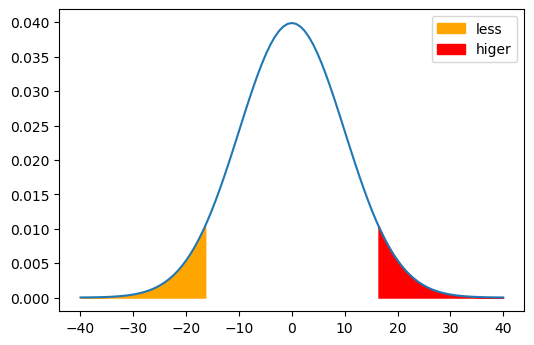

In [135]:
a = 40
x = np.linspace(-40, 40, 101)

plt.figure(dpi=100)
plt.plot(x, func.pdf(x))
plt.fill_between(np.linspace(-a, -delta, 101), func.pdf(np.linspace(-a, -delta, 101)), color="orange", label="less");
plt.fill_between(np.linspace(delta, a, 101), func.pdf(np.linspace(delta, a, 101)), color="red", label="higer");
plt.legend();

In [130]:
round(1 - func.cdf(delta), 4)  # честно смотрим на higer, но функция симметрична

0.0505

---
---
### 7
Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [129]:
round(1 - func.cdf(delta + 0.1), 4)

0.0495